<a href="https://colab.research.google.com/github/jmins33/ml_edu/blob/master/my_clf/0818_iris_sample2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 개요
IRIS 붓꽃 분류 모형을 만든다.

# (1) 패키지 불러오기
sklearn 패키지를 불러온다.

In [1]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


# (2) 데이터 불러오기
sklearn 패키지 내장 데이터 있음.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()  # bunch 형태의 데이터셋으로 구성되어 있음

# 독립변수 구성된 데이터
iris_data = iris.data

# 종속변수
iris_label= iris.target
print('iris target값:', iris_label[[0, 50, 100]])
print('iris target명:', iris.target_names)

iris target값: [0 1 2]
iris target명: ['setosa' 'versicolor' 'virginica']


# (3) 데이터 전처리
- 상황 : Numpy형태, 리스트
- 방법 : pandas를 활용하여 dataFrame 만들기
- ref : How to convert a Scikit-learn dataset to a Pandas dataset?
(https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset)

In [12]:
import pandas as pd

In [8]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [21]:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
iris_df['species']= iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# def sklearn_to_df(sklearn_dataset):
#    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
#    df['target'] = pd.Series(sklearn_dataset.target)
#    return df

# (4) 데이터 시각화
- 시각화를 위한 전처리

In [23]:
temp_data= iris_df.copy()
print(temp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [24]:
# 컬럼명 바꾸기
temp_data.columns=['sepal_length','sepal_width','petal_length','petal_width','species']
temp_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [27]:
# map
# 0-> ['setosa',
# 1-> 'versicolor', 
# 2->  'virginica']

replace_fct= {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
temp_data['species'] = temp_data['species'].map(replace_fct)
temp_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

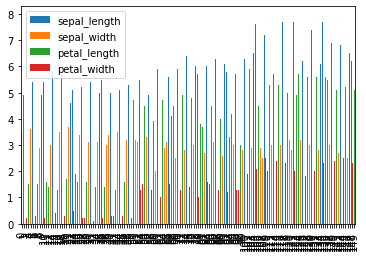

In [32]:
temp_data.plot(kind='bar')

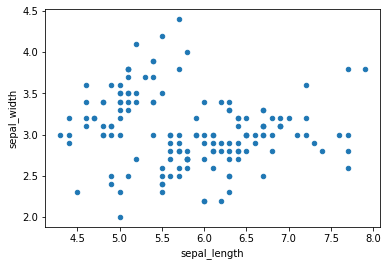

In [41]:
temp_data.plot(kind='scatter', x='sepal_length', y='sepal_width')

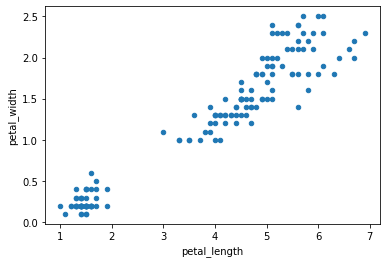

In [42]:
temp_data.plot(kind='scatter', x='petal_length', y='petal_width')

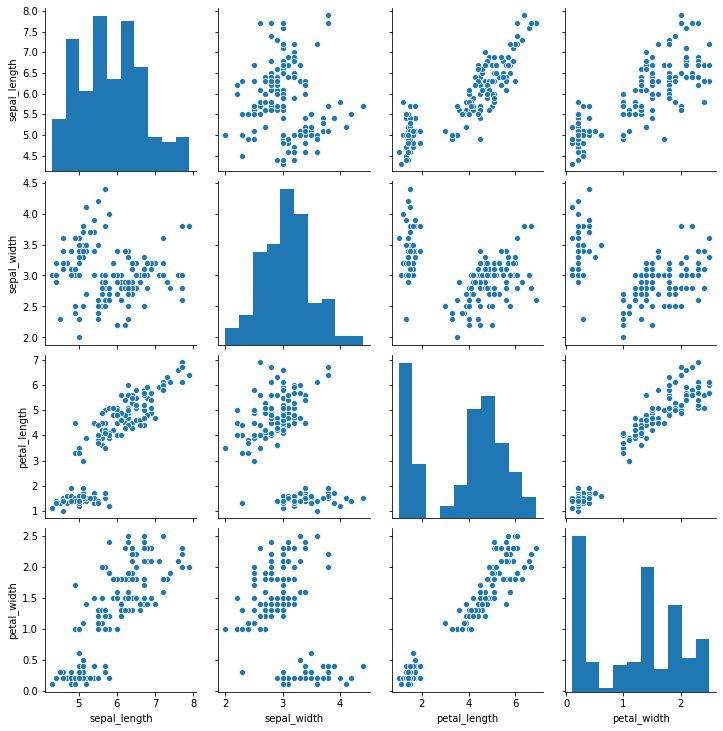

In [48]:
import seaborn as sns
sns.pairplot(temp_data)

# (5)데이터셋 분리
- 학습용 데이터와 테스트용 데이터 분리

train_test_split() 함수
- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력), 실험의 재현성을 위한 코드
- shuffle : 셔플여부설정 (default = True)
- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

[출처] [Python] sklearn의 train_test_split() 사용법|작성자 Paris Lee

In [50]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test= train_test_split(iris_data,
                                                   iris_label,
                                                   test_size=0.2,
                                                   random_state=1)

# (6) 머신러닝 모형 학습
- 머신러닝 모형을 만듭시다.

In [51]:
from sklearn.tree import DecisionTreeClassifier

# 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

# (7) 모형 테스트
- 모형 예측

In [55]:
from sklearn.metrics import accuracy_score
pred=dt_clf.predict(X_test)
print('The accuracy of the Decision Tree is:{:.3f}'.format(accuracy_score(pred, y_test)))

The accuracy of the Decision Tree is:0.967


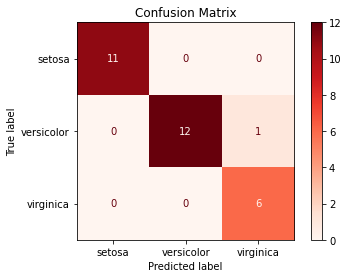

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');